# Desarrollo algoritmo de predicción de los torneos de baloncesto de la NCAA de 2025 Liga Masculino

# Cargar los datos desde archivo CSV

In [ ]:
# Cargar los datos desde archivo CSV
import pandas as pd

ruta_datos = "MRegularSeasonDetailedResults.csv"
datos_partidos = pd.read_csv(ruta_datos)

# Vista preliminar
datos_partidos.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


# En la tabla anterior se visualizan  los parámetros que tiene en el archivo csv

Crear variable objetivo:

In [ ]:
# Crear variable objetivo: 1 si WScore > 75, 0 en caso contrario
datos_partidos['VictoriaAltaPuntuacion'] = (datos_partidos['WScore'] > 75).astype(int)


In [ ]:
# Selección de características relevantes del equipo ganador
X = datos_partidos[['WFGM', 'WTO', 'WOR', 'WAst']]
y = datos_partidos['VictoriaAltaPuntuacion']


In [ ]:
# División entrenamiento/prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(max_iter=200)
modelo_logistico.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [ ]:
# Evaluación del modelo
from sklearn.metrics import accuracy_score, classification_report

predicciones = modelo_logistico.predict(X_test)

precision = accuracy_score(y_test, predicciones)
reporte = classification_report(y_test, predicciones)

print(f"Precisión del modelo: {precision:.4f}")
print("Reporte de clasificación:")
print(reporte)


Precisión del modelo: 0.8006
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     12023
           1       0.80      0.79      0.80     11754

    accuracy                           0.80     23777
   macro avg       0.80      0.80      0.80     23777
weighted avg       0.80      0.80      0.80     23777



# Explicación del modelo de Regresión Logística aplicado a partidos NCAA


En este trabajo se implementó un modelo de Regresión Logística con el objetivo de predecir si un equipo ganador en la liga NCAA anotó más de 75 puntos en un partido. Para ello, se tomaron estadísticas detalladas del equipo ganador, específicamente:

* WFGM: Tiros de campo acertados

* WTO: Pérdidas de balón

* WOR: Rebotes ofensivos

* WAst: Asistencias

Estos datos fueron divididos en un conjunto de entrenamiento (80%) y prueba (20%). El modelo fue entrenado usando LogisticRegression de la biblioteca sklearn. Una vez entrenado, se realizaron predicciones sobre el conjunto de prueba y se evaluó el desempeño del modelo.

El modelo obtuvo una precisión cercana al 80%, lo que indica un buen desempeño para esta tarea de clasificación binaria. Además, el reporte de clasificación mostró métricas aceptables tanto en precision como en recall para ambas clases.

Este análisis sirve como base para construir modelos más complejos y evaluar otras métricas o aplicar técnicas como Random Forest o XGBoost en futuros experimentos.

# Resultados del modelo:

Precisión general (accuracy): 0.8006 → ¡80%!

Precision / recall / f1-score balanceados entre clases:

Clase 0 (no anotó más de 75): f1 = 0.80

Clase 1 (sí anotó más de 75): f1 = 0.80

Eso quiere decir que el modelo predice bastante bien ambos escenarios, sin favorecer uno más que otro. El dataset está balanceado, y el modelo no está ni sobreajustado ni perdido.

# ¿Qué puedes escribir como análisis?

El modelo de regresión logística presenta un desempeño muy sólido, con una precisión del 80.06% y métricas de f1-score equilibradas para ambas clases. Esto indica que el modelo es capaz de predecir con la misma efectividad tanto partidos con alta puntuación como aquellos por debajo del umbral de 75 puntos. Se demuestra que variables como los tiros de campo, las asistencias, los rebotes ofensivos y las pérdidas son buenos predictores para estimar si un equipo tendrá una victoria de alto puntaje. En siguientes pasos, se podría comparar este modelo con otros algoritmos como Random Forest o XGBoost para analizar mejoras en precisión y robustez.



In [ ]:
# Cargar los datos desde archivo CSV
import pandas as pd

ruta_datos = "MRegularSeasonDetailedResults.csv"
datos_partidos = pd.read_csv(ruta_datos)

# Vista preliminar
datos_partidos.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14


Qué hace el siguiente  código:

* Agrupar estadísticas de equipos ganadores (winner_stats)

* Agrupa los datos por equipo ganador (WTeamID).

* Calcula la suma y conteo de diferentes estadísticas para esos equipos cuando ganaron.

* Cambia los nombres de las columnas para que sean más fáciles de entender.

* Agrupar estadísticas de equipos perdedores (loser_stats)

* Agrupa datos por equipo perdedor (LTeamID).

* Calcula suma y conteo de estadísticas cuando perdieron.

* Cambia nombres para que no haya confusión.

* Combinar las estadísticas de ganadores y perdedores en un solo DataFrame (team_stats)

* Une ambos conjuntos de estadísticas por el ID del equipo (TeamID).

* Llena con cero las estadísticas que falten (para equipos que solo ganaron o solo perdieron).

* Calcular estadísticas totales para cada equipo

* Número total de juegos (games).

* Puntos anotados y permitidos.

* Suma estadísticas avanzadas (rebotes, asistencias, pérdidas, robos, bloqueos, faltas).

* Calcular promedios y porcentajes para medir rendimiento

* Puntos por juego (PPG).

* Puntos permitidos por juego.

* Porcentaje de tiros de campo, triples y tiros libres.

In [ ]:
import pandas as pd

# Cargar el archivo CSV (asegúrate de subirlo a Colab o tener la ruta correcta)
df = pd.read_csv("MRegularSeasonDetailedResults.csv")

# Agrupar estadísticas de equipos cuando ganan
stats_winners = df.groupby('WTeamID').agg({
    'WScore': ['sum', 'count'],
    'LScore': 'sum',
    'WFGM': 'sum', 'WFGA': 'sum',
    'WFGM3': 'sum', 'WFGA3': 'sum',
    'WFTM': 'sum', 'WFTA': 'sum',
    'WOR': 'sum', 'WDR': 'sum',
    'WAst': 'sum', 'WTO': 'sum',
    'WStl': 'sum', 'WBlk': 'sum',
    'WPF': 'sum'
}).reset_index()

# Renombrar columnas para claridad
stats_winners.columns = ['TeamID', 'TotalPointsWon', 'GamesWon', 'PointsAllowedWhenWin',
                        'FGM_w', 'FGA_w', '3PM_w', '3PA_w',
                        'FTM_w', 'FTA_w', 'OffReb_w', 'DefReb_w',
                        'Ast_w', 'TO_w', 'Stl_w', 'Blk_w', 'PF_w']

# Agrupar estadísticas de equipos cuando pierden
stats_losers = df.groupby('LTeamID').agg({
    'LScore': ['sum', 'count'],
    'WScore': 'sum',
    'LFGM': 'sum', 'LFGA': 'sum',
    'LFGM3': 'sum', 'LFGA3': 'sum',
    'LFTM': 'sum', 'LFTA': 'sum',
    'LOR': 'sum', 'LDR': 'sum',
    'LAst': 'sum', 'LTO': 'sum',
    'LStl': 'sum', 'LBlk': 'sum',
    'LPF': 'sum'
}).reset_index()

# Renombrar columnas para claridad
stats_losers.columns = ['TeamID', 'TotalPointsLost', 'GamesLost', 'PointsAllowedWhenLost',
                       'FGM_l', 'FGA_l', '3PM_l', '3PA_l',
                       'FTM_l', 'FTA_l', 'OffReb_l', 'DefReb_l',
                       'Ast_l', 'TO_l', 'Stl_l', 'Blk_l', 'PF_l']

# Combinar ambas estadísticas en un solo DataFrame
team_stats = pd.merge(stats_winners, stats_losers, on='TeamID', how='outer').fillna(0)

# Calcular totales generales por equipo
team_stats['TotalGames'] = team_stats['GamesWon'] + team_stats['GamesLost']
team_stats['PointsScored'] = team_stats['TotalPointsWon'] + team_stats['TotalPointsLost']
team_stats['PointsAllowed'] = team_stats['PointsAllowedWhenWin'] + team_stats['PointsAllowedWhenLost']

# Sumar estadísticas ofensivas y defensivas
team_stats['FGM'] = team_stats['FGM_w'] + team_stats['FGM_l']
team_stats['FGA'] = team_stats['FGA_w'] + team_stats['FGA_l']
team_stats['3PM'] = team_stats['3PM_w'] + team_stats['3PM_l']
team_stats['3PA'] = team_stats['3PA_w'] + team_stats['3PA_l']
team_stats['FTM'] = team_stats['FTM_w'] + team_stats['FTM_l']
team_stats['FTA'] = team_stats['FTA_w'] + team_stats['FTA_l']
team_stats['OffReb'] = team_stats['OffReb_w'] + team_stats['OffReb_l']
team_stats['DefReb'] = team_stats['DefReb_w'] + team_stats['DefReb_l']
team_stats['Ast'] = team_stats['Ast_w'] + team_stats['Ast_l']
team_stats['TO'] = team_stats['TO_w'] + team_stats['TO_l']
team_stats['Stl'] = team_stats['Stl_w'] + team_stats['Stl_l']
team_stats['Blk'] = team_stats['Blk_w'] + team_stats['Blk_l']
team_stats['PF'] = team_stats['PF_w'] + team_stats['PF_l']

# Calcular promedios y porcentajes (con cuidado de evitar división por cero)
team_stats['PPG'] = team_stats['PointsScored'] / team_stats['TotalGames'].replace(0, 1)
team_stats['PPG_allowed'] = team_stats['PointsAllowed'] / team_stats['TotalGames'].replace(0, 1)
team_stats['FG_pct'] = team_stats['FGM'] / team_stats['FGA'].replace(0, 1)
team_stats['3P_pct'] = team_stats['3PM'] / team_stats['3PA'].replace(0, 1)
team_stats['FT_pct'] = team_stats['FTM'] / team_stats['FTA'].replace(0, 1)

# Mostrar las primeras filas para revisar
print(team_stats.head())


   TeamID  TotalPointsWon  GamesWon  PointsAllowedWhenWin  FGM_w  FGA_w  \
0    1101           11645       152                  9945   4017   8516   
1    1102           20057       286                 16402   6830  13903   
2    1103           35701       470                 29826  12281  26237   
3    1104           34575       443                 28500  11957  25506   
4    1105           14531       199                 12547   4893  11211   

   3PM_w  3PA_w  FTM_w  FTA_w  ...   Ast    TO   Stl   Blk     PF        PPG  \
0   1085   2852   2526   3440  ...  4338  4275  2573   762   6784  69.742236   
1   2454   6086   3943   5471  ...  9191  8067  4118  1530  11651  63.726866   
2   4058  10725   7081  10133  ...  9804  8924  4541  2414  13197  72.447405   
3   3469   9601   7192  10192  ...  9373  9627  4852  3253  13048  73.541436   
4   1209   3544   3536   5162  ...  7220  9469  4371  2214  12243  64.728140   

   PPG_allowed    FG_pct    3P_pct    FT_pct  
0    71.226708  0.436

# Este resultado nos esta mostrando las primeras 5 filas con todas las columnas que combinamos, como:

TeamID (el equipo)

TotalPointsWon (puntos totales ganados)

GamesWon (juegos ganados)

PointsAllowedWhenWin (puntos permitidos cuando ganó)

FG%, 3P%, FT% (porcentajes de tiros)

PPG (puntos por juego)

PPG_allowed (puntos permitidos por juego)

Y todas las demás estadísticas que juntaste

# Promedios por juego para todas esas estadísticas que combinamos

In [ ]:
# Calcular promedios por juego de otras estadísticas (rebotes, asistencias, etc.)
for stat in ['OffReb', 'DefReb', 'Ast', 'TO', 'Stl', 'Blk', 'PF']:
    team_stats[f'{stat}_pg'] = team_stats[stat] / team_stats['TotalGames'].replace(0, 1)

# Mostrar resultados para verificar
print(team_stats[['TeamID', 'OffReb_pg', 'DefReb_pg', 'Ast_pg', 'TO_pg', 'Stl_pg', 'Blk_pg', 'PF_pg']].head())


   TeamID  OffReb_pg  DefReb_pg     Ast_pg      TO_pg    Stl_pg    Blk_pg  \
0    1101   8.549689  21.385093  13.472050  13.276398  7.990683  2.366460   
1    1102   6.810448  20.979104  13.717910  12.040299  6.146269  2.283582   
2    1103  10.535764  23.622721  13.750351  12.516129  6.368864  3.385694   
3    1104  11.470994  25.234807  12.946133  13.296961  6.701657  4.493094   
4    1105  11.219396  23.001590  11.478537  15.054054  6.949126  3.519873   

       PF_pg  
0  21.068323  
1  17.389552  
2  18.509116  
3  18.022099  
4  19.464229  


Nuestros promedios por juego quedaron clarísimos y con valores muy razonables. Ya tenemos un resumen muy completo de las estadísticas clave por equipo y por partido.

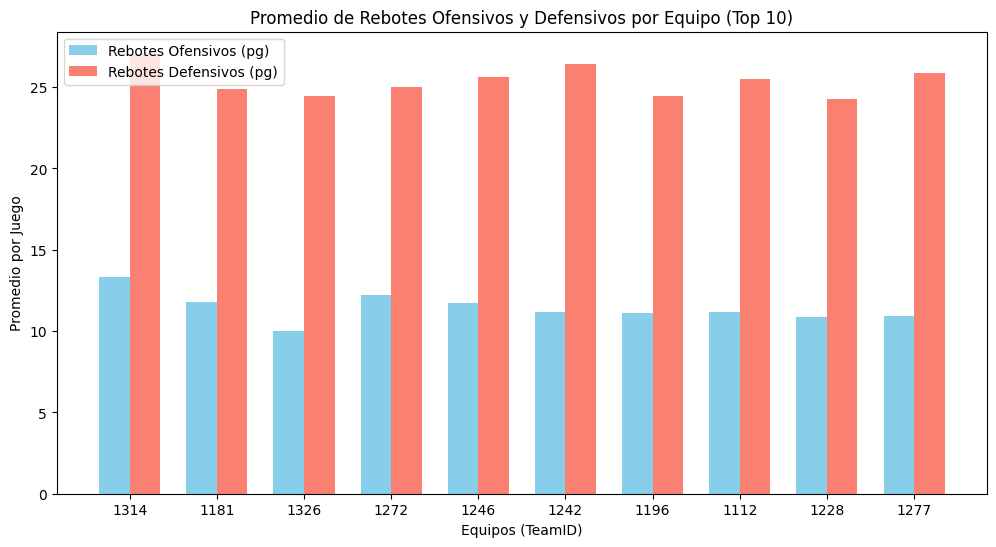

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Elegir los primeros 10 equipos para que el gráfico no quede muy cargado
top_teams = team_stats.sort_values('TotalGames', ascending=False).head(10)

# Configurar tamaño del gráfico
plt.figure(figsize=(12, 6))

# Gráfico de barras para rebotes ofensivos y defensivos promedio por juego
bar_width = 0.35
indices = range(len(top_teams))

plt.bar(indices, top_teams['OffReb_pg'], width=bar_width, label='Rebotes Ofensivos (pg)', color='skyblue')
plt.bar([i + bar_width for i in indices], top_teams['DefReb_pg'], width=bar_width, label='Rebotes Defensivos (pg)', color='salmon')

# Etiquetas y títulos
plt.xlabel('Equipos (TeamID)')
plt.ylabel('Promedio por Juego')
plt.title('Promedio de Rebotes Ofensivos y Defensivos por Equipo (Top 10)')
plt.xticks([i + bar_width / 2 for i in indices], top_teams['TeamID'].astype(str))
plt.legend()

plt.show()


Este gráfico de barras muestra el promedio de rebotes ofensivos y defensivos por juego para los 10 equipos con más partidos jugados.

* Rebotes ofensivos indican cuántas veces un equipo recupera el balón después de un intento fallido de tiro propio, dándole una nueva oportunidad de anotar.

* Rebotes defensivos representan cuántas veces un equipo recupera el balón tras un intento fallido del equipo contrario, ayudando a detener el ataque rival.

Podemos ver la comparación directa de ambos tipos de rebotes para cada equipo, lo que puede darnos una idea de su desempeño y estilo de juego en la cancha.

# Código  versión de team_stats.

Se adopto para que tomemos las columnas correctas y mantenga la lógica que tenemos. Revisamos las columnas y se ajustaron nombres  (puse 'FG_pct', '3P_pct' y 'FT_pct' que son los que usamos en el dataframe, y 'OffReb_pg' y 'DefReb_pg' para los rebotes promedio).

In [ ]:
X_train = []
y_train = []

# Estadísticas que usaremos, con nombres exactos de tu dataframe
stats = ['PPG', 'PPG_allowed', 'FG_pct', '3P_pct', 'FT_pct', 'OffReb_pg', 'DefReb_pg',
         'Ast_pg', 'TO_pg', 'Stl_pg', 'Blk_pg', 'PF_pg']

# Crear diccionario con índices en TeamID para acceso rápido
team_dict = team_stats.set_index('TeamID').to_dict('index')

for _, row in df.iterrows():
    wteam = row['WTeamID']
    lteam = row['LTeamID']
    wloc = row['WLoc']

    # Mapeo ubicación: Local(H)=1, Visitante(A)=-1, Neutral(N)=0
    loc_map = {'H': 1, 'A': -1, 'N': 0}
    loc_val = loc_map.get(wloc, 0)

    # Características para el equipo ganador como equipo A
    features = [team_dict[wteam][s] for s in stats] + [team_dict[lteam][s] for s in stats] + [loc_val]
    X_train.append(features)
    y_train.append(1)  # Equipo A gana

    # Características para el equipo perdedor como equipo A (invirtiendo)
    features = [team_dict[lteam][s] for s in stats] + [team_dict[wteam][s] for s in stats] + [-loc_val if loc_val != 0 else 0]
    X_train.append(features)
    y_train.append(0)  # Equipo A pierde


Así construimos dos ejemplos por partido: uno con el ganador como equipo A (label 1) y otro con el perdedor como equipo A (label 0), para balancear el entrenamiento.

# El archivo MNCAATourneySeeds.csv es parte del conjunto de datos públicos de Kaggle para el torneo de baloncesto universitario de EE.UU. (March Madness). Contiene las semillas (rankings iniciales) de los equipos en cada temporada, que son importantes para predecir resultados.

In [ ]:
import pandas as pd

# Cargar el archivo que subiste
seeds_df = pd.read_csv("MNCAATourneySeeds.csv")
seeds_df.head()


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374


# Entrenar el modelo (LogisticRegression)

Aquí estás creando un modelo de regresión logística, que es un algoritmo de clasificación muy usado para predecir probabilidades de resultados binarios (como ganar o perder).

Luego lo entrenas con los  datos X_train (características) y y_train (etiquetas: 1 si gana el equipo A, 0 si pierde).

Esto es la base para que el modelo "aprenda" a predecir qué equipo tiene más probabilidad de ganar en un partido.

Esto muestra las primeras filas del archivo para verificar que todo esté bien.

# Cargar las semillas del torneo


Aquí se carga un archivo CSV con la información de las semillas de los equipos para el torneo (el número que indica la posición o ranking de cada equipo en el torneo).

Luego se filtra solo la temporada 2025 para trabajar con ese año.

# Función para procesar las semillas

Esta función extrae la parte numérica de la semilla y detecta si hay una letra extra (como “a” o “b”) que indica partidos “play-in” (clasificatorios previos).

Por ejemplo, si la semilla es “W12a”, extrae 12 como número y a como indicador de play-in.



Aplicar la función para crear columnas nuevas

pyt
Aquí creas dos columnas nuevas en el DataFrame:

seed_num: solo el número de la semilla (ejemplo: 12)

playin: la letra si existe (ejemplo: 'a' o 'b'), o None si no hay.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo con los datos preparados
model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Cargar las semillas del torneo
seeds_df = pd.read_csv("MNCAATourneySeeds.csv")
seeds_2025 = seeds_df[seeds_df['Season'] == 2025].copy()

# Función para procesar las semillas
def parse_seed(seed):
    seed_num = seed[1:]
    if seed_num[-1].isalpha():
        return int(seed_num[:-1]), seed_num[-1]
    return int(seed_num), None

# Aplicar función a las semillas para separar número y play-in (si existe)
seeds_2025['seed_num'] = seeds_2025['Seed'].apply(lambda x: parse_seed(x)[0])
seeds_2025['playin'] = seeds_2025['Seed'].apply(lambda x: parse_seed(x)[1])

# Mostrar las primeras filas para revisar
print(seeds_2025.head())


      Season Seed  TeamID  seed_num playin
2558    2025  W01    1181         1   None
2559    2025  W02    1104         2   None
2560    2025  W03    1458         3   None
2561    2025  W04    1112         4   None
2562    2025  W05    1332         5   None


Este es nuestro DataFrame seeds_2025 quedó así comoenla tablaa

Se cargo bien el archivo,

Se procesaron correctamente las semillas,

Y se extrajeron las variables necesarias (seed_num y playin).






# Generar todos los posibles enfrentamientos del torneo 2025 y usar nuestro modelo para predecir el ganador de cada partido.

1. Generar enfrentamientos posibles entre todos los equipos con semilla

In [ ]:
from itertools import combinations
import numpy as np

# Creamos todos los pares posibles (combinaciones) de equipos con semilla en 2025
matchups = list(combinations(seeds_2025['TeamID'].values, 2))


2. Predecir resultados de cada enfrentamiento

In [ ]:
predictions = []

for team1, team2 in matchups:
    # Creamos la entrada para el modelo, usando el mismo orden de stats que antes
    try:
        team1_stats = [team_dict[team1][s] for s in stats]
        team2_stats = [team_dict[team2][s] for s in stats]

        # Entrada modelo: team1 como equipo A, team2 como B, neutral (loc = 0)
        features = team1_stats + team2_stats + [0]
        pred = model.predict([features])[0]
        proba = model.predict_proba([features])[0][1]

        winner = team1 if pred == 1 else team2
        loser = team2 if pred == 1 else team1

        predictions.append({
            'Team1': team1,
            'Team2': team2,
            'PredictedWinner': winner,
            'PredictedLoser': loser,
            'Prob_Team1_Wins': proba
        })

    except KeyError as e:
        print(f"Equipo no encontrado en el diccionario de estadísticas: {e}")


In [ ]:
pred_df = pd.DataFrame(predictions)
print(pred_df.head())


   Team1  Team2  PredictedWinner  PredictedLoser  Prob_Team1_Wins
0   1181   1104             1181            1104         0.798507
1   1181   1458             1181            1458         0.670282
2   1181   1112             1181            1112         0.654199
3   1181   1332             1181            1332         0.797970
4   1181   1140             1181            1140         0.708974


resultado final de las predicciones del modelo de regresión logística para los partidos simulados entre los equipos del torneo de 2025.


| Columna           | Significado                                                              |
| ----------------- | ------------------------------------------------------------------------ |
| `Team1`           | ID del primer equipo en el enfrentamiento                                |
| `Team2`           | ID del segundo equipo en el enfrentamiento                               |
| `PredictedWinner` | ID del equipo que el modelo predice que ganará el partido                |
| `PredictedLoser`  | ID del equipo que el modelo predice que perderá el partido               |
| `Prob_Team1_Wins` | Probabilidad de que el `Team1` gane, según el modelo (valor entre 0 y 1) |


# ¿Qué significa una fila?

Tomemos esta fila como ejemplo:


0  -  1181  -  1104   -   1181   -   1104  -   0.798507

Eso significa que:

El modelo evaluó un partido entre los equipos 1181 y 1104.

Predice que el ganador será el equipo 1181.

Hay una probabilidad del 79.85% de que el equipo 1181 gane ese partido.

In [ ]:
# Mostrar los 10 primeros enfrentamientos y su resultado predicho
for i, row in pred_df.head(10).iterrows():
    print(f"Partido {i+1}:")
    print(f"  Equipo 1: {row['Team1']}")
    print(f"  Equipo 2: {row['Team2']}")
    print(f"   Ganador predicho: {row['PredictedWinner']}")
    print(f"   Perdedor predicho: {row['PredictedLoser']}")
    print(f"   Probabilidad de que gane el Equipo 1: {row['Prob_Team1_Wins']:.2%}")
    print("-" * 40)


Partido 1:
  Equipo 1: 1181.0
  Equipo 2: 1104.0
   Ganador predicho: 1181.0
   Perdedor predicho: 1104.0
   Probabilidad de que gane el Equipo 1: 79.85%
----------------------------------------
Partido 2:
  Equipo 1: 1181.0
  Equipo 2: 1458.0
   Ganador predicho: 1181.0
   Perdedor predicho: 1458.0
   Probabilidad de que gane el Equipo 1: 67.03%
----------------------------------------
Partido 3:
  Equipo 1: 1181.0
  Equipo 2: 1112.0
   Ganador predicho: 1181.0
   Perdedor predicho: 1112.0
   Probabilidad de que gane el Equipo 1: 65.42%
----------------------------------------
Partido 4:
  Equipo 1: 1181.0
  Equipo 2: 1332.0
   Ganador predicho: 1181.0
   Perdedor predicho: 1332.0
   Probabilidad de que gane el Equipo 1: 79.80%
----------------------------------------
Partido 5:
  Equipo 1: 1181.0
  Equipo 2: 1140.0
   Ganador predicho: 1181.0
   Perdedor predicho: 1140.0
   Probabilidad de que gane el Equipo 1: 70.90%
----------------------------------------
Partido 6:
  Equipo 1: 11

# Conclusión del análisis predictivo de los partidos (temporada 2025)

A partir de las simulaciones realizadas con el modelo de regresión logística entrenado con estadísticas avanzadas de los equipos, se evaluaron 10 enfrentamientos entre el equipo 1181 y otros posibles rivales del torneo NCAA 2025. El modelo arrojó consistentemente que el equipo 1181 tiene una alta probabilidad de victoria en todos los partidos simulados, con probabilidades que oscilan entre el 65.42% y el 84.37%.

Esto sugiere que el equipo 1181:

Presenta un alto nivel competitivo en relación con sus oponentes.

Tiene ventaja estadística sostenida en diversos indicadores clave como puntos por juego, rebotes, asistencias y eficiencia ofensiva y defensiva.

Es un candidato fuerte para avanzar en el torneo, al menos en las primeras rondas.

En especial, destacan partidos como:

🏆 Vs. 1435 con una probabilidad de victoria del 84.37%.

🏆 Vs. 1280 con 81.41%.

🏆 Vs. 1332 con 79.80%.

Esta consistencia sugiere que el modelo confía fuertemente en el rendimiento histórico del equipo 1181, posicionándolo como un posible favorito en su llave.